# Forward Problem

```{contents} Table of Contents
:depth: 3
```

## Assumptions and setup

Suppose that there exists $N$ individuals who can exist in one of three disease states starting at time $0$ and ending at time $T$:
1. Susceptible - An individual is not infected at present but can be infected in the future.
2. Infected - An individual is infected at present and can infect other susceptible individuals. 
3. Removed - An individual is no longer susceptible, nor infected, and cannot again become infected. 

- Assume, for each time unit, that all $N$ individuals come into contact with one another, and that each interaction is independent. 
When a susceptible comes into contact with an infected, the susceptible individual has a probability $p$ of moving from the susceptible state to the infected state ($S \to I$). 

- Assume that if an individual is infected then they (1) are only infected for a single time unit and (2) after that time units ends they are removed. 

- Assume that the probability of infection should depend on the number of infected individuals in the population.

## Probability of escape and infection

Consider a single susceptible individual. 
At time $t$, this susceptible individual will contact all $I$ infected individuals. 
At each contact between the susceptible individual and one of the infected individuals, there is a probability $p$ that the infected individual is successful and infects this susceptible individual.

If $p$ is the probability that an infected individual---often called can infector---can infect this susceptible then the probability that an infector does **not** infect this susceptible is $1-p$.
Then the probability that this susceptible is not infected by the first member in $I$ is $(1-p)$ and the probability that this this susceptible is not infected by the first **and** second infector is 

$$
(1-p) \times (1-p)
$$

and so the probability that this susceptible is not infected by all infectors in $I$ is 

$$
p(\text{escape}) = (1-p) \times (1-p)\times (1-p) \cdots \times (1-p) = (1-p)^{I}
$$
This is typically called the **escape probability**. 

If $(1-p)^{I}$ is the probability that no infector successfully infects this susceptible then the probability that at least one individual infects this susceptible is 

$$
 p(\text{infection}) = 1 - \left[(1-p)^{I}\right]
$$

## Initial conditions

The above assumptions and conditions assume that the $N$ individuals who can exist in one of three disease states may move from one disease state to another *over time*.
Let us be explicit, and define the number of individuals in each disease state at time $0$, and define how the number of individuals in each of the three disease states is expected to change over time. 

The **initial conditions** assigns a number of individuals to each disease state at time $0$, and is denoted 
\begin{align}
i_{0} &= i^{0}\\ 
s_{0} &= s^{0}\\
r_{0} &= r^{0}
\end{align}
where lowercase letters denote an observed or realized number of individuals in each disease state at time $0$ (the subscript) and lowercase letters with a superscript denote values between $0$ and $N$. 
For this model, the sum of the number of individuals in each disease state must equal $N$. 

## Evolution

Now that we have specified, at time $0$, the number of individuals who belong to the susceptible disease state ($s_{0}$), number of individuals who belong to the infected disease state ($i_{0}$), and number of individuals who belong to the removed disease state ($r_{0}$), we must decide the number of individuals at **the next time step**.

At time $t$, suppose that there exists $S_{t}$ susceptible individuals. 
A susceptible individual moves to the infected state with probability $1 - (1-p)^{I_{t}}$ (see above section on escape). 
Further, we assume that for each susceptible the probability of moving to the infected state is independent. 
If we define "success" as $1 - (1-p)^{I_{t}}$ and the number of trials as $S_{t}$ then the **potential number of infected individuals at time $t+1$ or $I_{t+1}$** has a Binomial distribution, 

\begin{align}
I_{t+1} &\sim \text{Bin}\left(S_{t}, \left[1 - (1-p)^{i_{t}}\right] \right).
\end{align}

Let the observed number of infected individuals at time $t+1$ equal $i_{t+1}$.
Then the number of susceptibles at the next time step is then equal to the number of susceptibles at time $t$ minus the number of susceptibles who became infected. 

\begin{align}
s_{t+1} &= s_{t} - i_{t+1} \\ 
\end{align}

Finally, we assume that at the end of each time unit all infected individuals at time $t$ move to the "removed" category. So then, 
\begin{align}
r_{t+1} &= r_{t}+ i_{t}
\end{align}

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets.embed import embed_minimal_html

def Reed_Frost_Dynamical_system(sims=10, T=15, N=1000, i0=1, p=0.02,show=True):
    def evolve(T,N,i0,p):
        import numpy as np 
        import matplotlib.pyplot as plt

        infectors    = [i0]
        removed      = [0]
        susceptibles = [N-i0]
        for t in range(T):
            i_tp1 = np.random.binomial(n=susceptibles[-1], p=1-(1-p)**( infectors[-1] ) , size=1  ) [0]
            s_tp1 = susceptibles[-1] - i_tp1
            r_tp1 = removed[-1] + infectors[-1]

            infectors.append(i_tp1)
            susceptibles.append(s_tp1)
            removed.append(r_tp1)
        infectors = np.array(infectors)

        return infectors

    fig,ax = plt.subplots()
    for _ in range(sims):
        infectors = evolve(T,N,i0,p)
        ax.plot(infectors)
    ax.set_ylim(0,75)
    ax.set_xlabel("Time units (t)",fontsize=10)
    ax.set_ylabel("Number of infectors (It)",fontsize=10)
    if show:
        plt.show()
    return ax
        

interact(Reed_Frost_Dynamical_system
         ,T=fixed(15)
         ,N=fixed(100)
         ,r0=fixed(0)
         ,sims=widgets.IntSlider(min=10, max=100, step=10, value=50) 
         ,i0=widgets.IntSlider(min=0, max=20, step=1, value=1) 
         ,p=(0,0.1,0.00125)
        ,show=True)

interactive(children=(IntSlider(value=50, description='sims', min=10, step=10), IntSlider(value=1, description…

<function __main__.Reed_Frost_Dynamical_system(sims=10, T=15, N=1000, i0=1, p=0.02, show=True)>

## The model 
We can think of the Reed-frost process as a model. 
Given parameters: number of time units to simulate the process, $T$, and probability that an infector passes the pathogen to a susceptible, $p$, the model produces a $3 \times T$ matrix of values.
The first row is a sequence of susceptible, second row infectors, and third row removed individuals. 

Further, if we observed data on the number of susceptible, infected, and removed individuals over time then we could assign a probability to these observations. 

Assume we know $(s_{0},i_{0})$.
Then the Reed-Frost model assumes that the number of infectors at the next time point is a Binomial distributed random variable 

\begin{align}
    I_{1} | s_{0}, i_{0}, p &\sim \text{Bin}(s_{0}, 1-(1-p)^{i0}) \\ 
    supp(I_{1}) &= [0, s_{0} ]
\end{align}

If we observed that the number of infectors was $i_{1}$ then we can assign a probability to this observation

\begin{align}
    P( I_{1} = i_{1}) = \binom{s_{0}}{i_{1}} \left[1-(1-p)^{i0}\right]^{i_{1}} \left[(1-p)^{i0}\right]^{s_{0}-i_{1}}
\end{align}

The probability assigned to s,i,r at time $t+1$ only depends on the number of susceptbiles, infectors, and removed at time $t$. 
This means that we can compute the probability of observing s,i,r over time as 

\begin{align}
    p( [S_{0},I_{0},R_{0}] , [S_{1},I_{1},R_{1}], [S_{2},I_{2},R_{2}] ) & = p([S_{2},I_{2},R_{2}] \; | \; [S_{0},I_{0},R_{0}] , [S_{1},I_{1},R_{1}]) \times p([S_{0},I_{0},R_{0}] , [S_{1},I_{1},R_{1}]) \\ 
    & = p([S_{2},I_{2},R_{2}] \; | \; [S_{0},I_{0},R_{0}] , [S_{1},I_{1},R_{1}]) \times p([S_{1},I_{1},R_{1}] \; | \; [S_{0},I_{0},R_{0}]) \times  p([S_{0},I_{0},R_{0}]) \\ 
    & = p([S_{2},I_{2},R_{2}] \; | \; [S_{1},I_{1},R_{1}]) \times p([S_{1},I_{1},R_{1}] \; | \; [S_{0},I_{0},R_{0}])  \times p([S_{0},I_{0},R_{0}]) \\ 
    &= \binom{s_{1}}{i_{2}} \left[1-(1-p)^{i1}\right]^{i_{2}} \left[(1-p)^{i1}\right]^{s_{1}-i_{2}} \times \binom{s_{0}}{i_{1}} \left[1-(1-p)^{i0}\right]^{i_{1}} \left[(1-p)^{i0}\right]^{s_{0}-i_{1}} \times 1
\end{align}

In [168]:
import scipy 

N = 100 
p = np.random.beta(1,9, size=N)

def Reed_Frost_Dynamical_system(sims=10, T=15, N=1000, i0=1, p=0.02):
    import numpy as np 
    import matplotlib.pyplot as plt

    infectors    = [i0]
    removed      = [0]
    susceptibles = [N-i0]
    for t in range(T):
        i_tp1 = np.random.binomial(n=susceptibles[-1], p=1-(1-p)**( infectors[-1] ) , size=1  ) [0]
        s_tp1 = susceptibles[-1] - i_tp1
        r_tp1 = removed[-1] + infectors[-1]

        infectors.append(i_tp1)
        susceptibles.append(s_tp1)
        removed.append(r_tp1)
    infectors = np.array(infectors)
    return susceptibles,infectors,removed

#--DATA (assumed to be observed)
s,i,r = Reed_Frost_Dynamical_system(sims=10, T=15, N=1000, i0=1, p=0.02)

In [169]:
p_grid = np.linspace(0.001, 0.1, 500)  # restrict to [0.001,0.1] if you know p is small
log_likelihoods = []

for p in p_grid:
    log_like = np.sum(scipy.stats.binom(n=s[:-1], p=1 - (1-p)**i[:-1]).logpmf(i[1:]))
    log_likelihoods.append(log_like)

p_max = p_grid[np.argmax(log_likelihoods)]
log_likelihood_max = np.max(log_likelihoods)

p_max

np.float64(0.01905410821643287)

In [170]:
p_samples = []
for _ in range(5000):
    p=-1
    while p<0:
        p = np.random.normal(p_max,0.1)
    
    u = np.random.uniform()
    
    likelihood = np.sum(scipy.stats.binom(n=s[:-1],p=1-(1-p)**i[:-1] ).logpmf(i[1:]))
    prior      = scipy.stats.beta(1,1).logpdf(p)
    
    f = lambda p: -1*np.sum(scipy.stats.binom(n=s[:-1],p=1-(1-p)**i[:-1] ).logpmf(i[1:]))
    
    from scipy.optimize import minimize
    
    if np.log(u) < (likelihood + prior) - log_likelihood_max:
        p_samples.append(p)

(array([ 3.,  1.,  5.,  7., 15., 10., 14., 11.,  6.,  2.]),
 array([0.01718068, 0.01753852, 0.01789635, 0.01825419, 0.01861202,
        0.01896985, 0.01932769, 0.01968552, 0.02004336, 0.02040119,
        0.02075903]),
 <BarContainer object of 10 artists>)

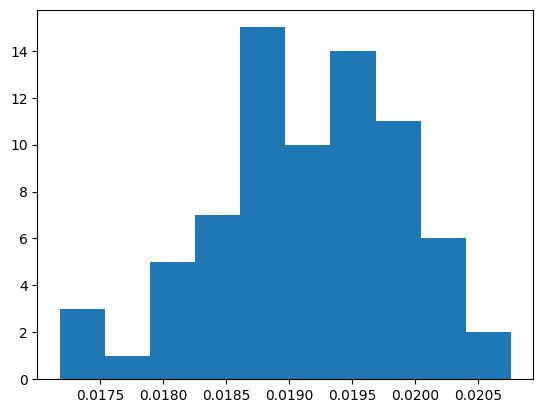

In [171]:
plt.hist(p_samples)

np.float64(0.02004609218436874)